In [98]:
import numpy as np
from matplotlib import pyplot as plt

In [99]:
#load dataset
u = np.loadtxt("../lab2_1_data.csv", delimiter=",", unpack=True)

In [100]:
def linear_model(u,w):
    return np.dot(u,w)

In [101]:
#w = np.transpose(np.array([np.random.rand(100),np.random.rand(100)]))
w = np.random.rand(2)*2 - 1 

#print(u[1])

#y = linear_model(u[1], *w)
#print(y)
#print('\n\n w',w)
#print('\n\n u',u)
#v = linear_model(u[0], w[0])
#print('\n\n v',v)

w_hist = w
print(w_hist)
a = [1,2]
b= [3,4]
w_hist = np.vstack((w_hist, a))
w_hist = np.vstack((w_hist, b))

print(w_hist)

print(np.transpose(w_hist))
print(np.transpose(w_hist)[0])

[ 0.53987559 -0.49765479]
[[ 0.53987559 -0.49765479]
 [ 1.          2.        ]
 [ 3.          4.        ]]
[[ 0.53987559  1.          3.        ]
 [-0.49765479  2.          4.        ]]
[0.53987559 1.         3.        ]


10000
w1 [5.39875591e-01 5.46083441e-01 5.47523853e-01 ... 8.40611485e+24
 8.41420043e+24 8.45336151e+24]


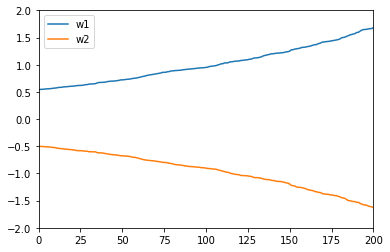

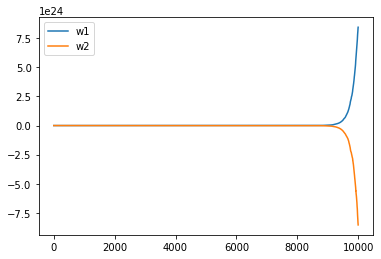

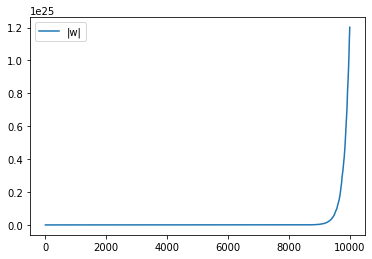

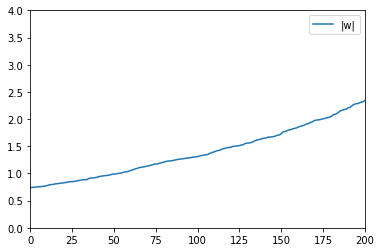

In [102]:
#3) Implement Basic Hebb Rule
eta = 0.01
threshold = 1e-3

epochs = 100
#v = np.zeros(len(u))
w1 = np.zeros(len(u)*epochs)
w2 = np.zeros(len(u)*epochs)
print(len(w1))

w_hist = w
wold = w
#j = 0
for N in range (epochs):
    uu = np.random.permutation(u)  
    #uu = u
    for i in range (len(uu)):
        v = linear_model(uu[i], w)
        w = w + eta*np.dot(v,uu[i])
        w_hist = np.vstack((w_hist, w))
        #w1[j] = w[0]
        #w2[j] = w[1]
        #j=j+1
    if np.linalg.norm(w-wold) < threshold:
        break
    wold = w

w1 = (np.transpose(w_hist))[0]
print('w1',w1)
w2 = (np.transpose(w_hist))[1]
w_norm = np.sqrt(w1**2+w2**2)
t=np.arange(0,len(w1))

plt.figure()
plt.xlim(0,200)
plt.ylim(-2,2)
plt.plot(t,w1, label='w1')
plt.plot(t,w2, label='w2')
plt.legend()

plt.figure()
plt.plot(t,w1, label='w1')
plt.plot(t,w2, label='w2')
plt.legend()

plt.figure()
plt.plot(t,w_norm, label='|w|')
plt.legend()
plt.show()


plt.figure()
plt.plot(t,w_norm, label='|w|')
plt.legend()
plt.xlim(0,200)
plt.ylim(0,4)
plt.show()


[[ 0.32640973 -0.25904598]
 [-0.25904598  0.321666  ]]


 max eigvect [ 0.71033647 -0.70386228]
0.7103364653931533


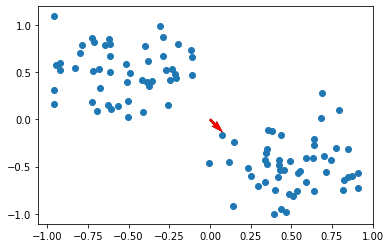

In [103]:
#P1
u1 = (np.transpose(u))[0]
u2 = (np.transpose(u))[1]

#print(ww)

plt.scatter(u1,u2)
#plt.scatter(*ww, color= 'r')
plt.quiver(*w)
#plt.xlim(-12,1)
#plt.ylim(-1,10)

Q = np.array([[0,0], [0,0]])
for i in range (len(u)):
     Q = Q + np.outer(u[i],u[i])

Q = Q/len(u)

print(Q)
eig_val, eig_vec = np.linalg.eig(Q)
#print(eig_val)
n = np.argmax(eig_val)
max_eigvect = eig_vec[:,n]
print('\n\n max eigvect',max_eigvect)

print(max_eigvect[0])
plt.quiver(max_eigvect[0], max_eigvect[1], color='red')

plt.show()

